In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import seaborn as sns
import anndata as ad

In [2]:
in_dir = '../../results/04_spatial/09_run_cell2location'
out_dir = '../../results/04_spatial/13_cell_colocalization'

In [13]:
os.makedirs(out_dir, exist_ok=True)

In [3]:
sample_list = ['HC01', 'HC02', 'HC03', 'HC05']

In [4]:
df_list = []
for sample in sample_list:
    adata = sc.read_h5ad(f'{in_dir}/{sample}.h5ad')
    
    df = adata.obsm['q05_cell_abundance_w_sf']
    df = df.div(df.sum(axis=1), axis=0)
    df.columns = adata.uns['mod']['factor_names']
    
    df_list.append(df)
    
df_healthy = pd.concat(df_list)

In [5]:
df_healthy.shape

(5330, 17)

In [6]:
correlation = df_healthy.corr(method='spearman')

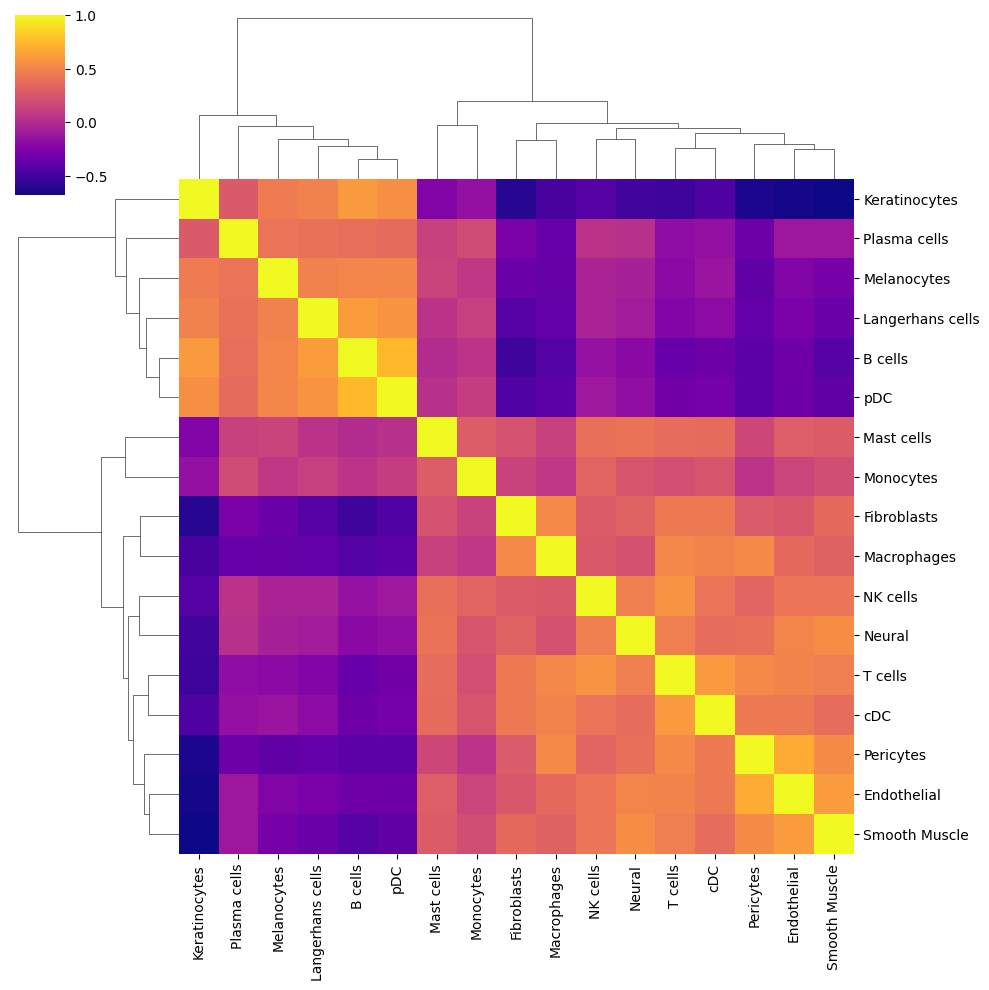

In [7]:
sns.clustermap(correlation, cmap='plasma')

In [8]:
sample_list = ['SSc4994', 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35']

In [9]:
df_list = []
for sample in sample_list:
    adata = sc.read_h5ad(f'{in_dir}/{sample}.h5ad')
    
    df = adata.obsm['q05_cell_abundance_w_sf']
    df = df.div(df.sum(axis=1), axis=0)
    df.columns = adata.uns['mod']['factor_names']
    
    df_list.append(df)
    
df_ssc = pd.concat(df_list)

In [10]:
df_ssc.shape

(7874, 17)

In [11]:
correlation = df_ssc.corr(method='spearman')

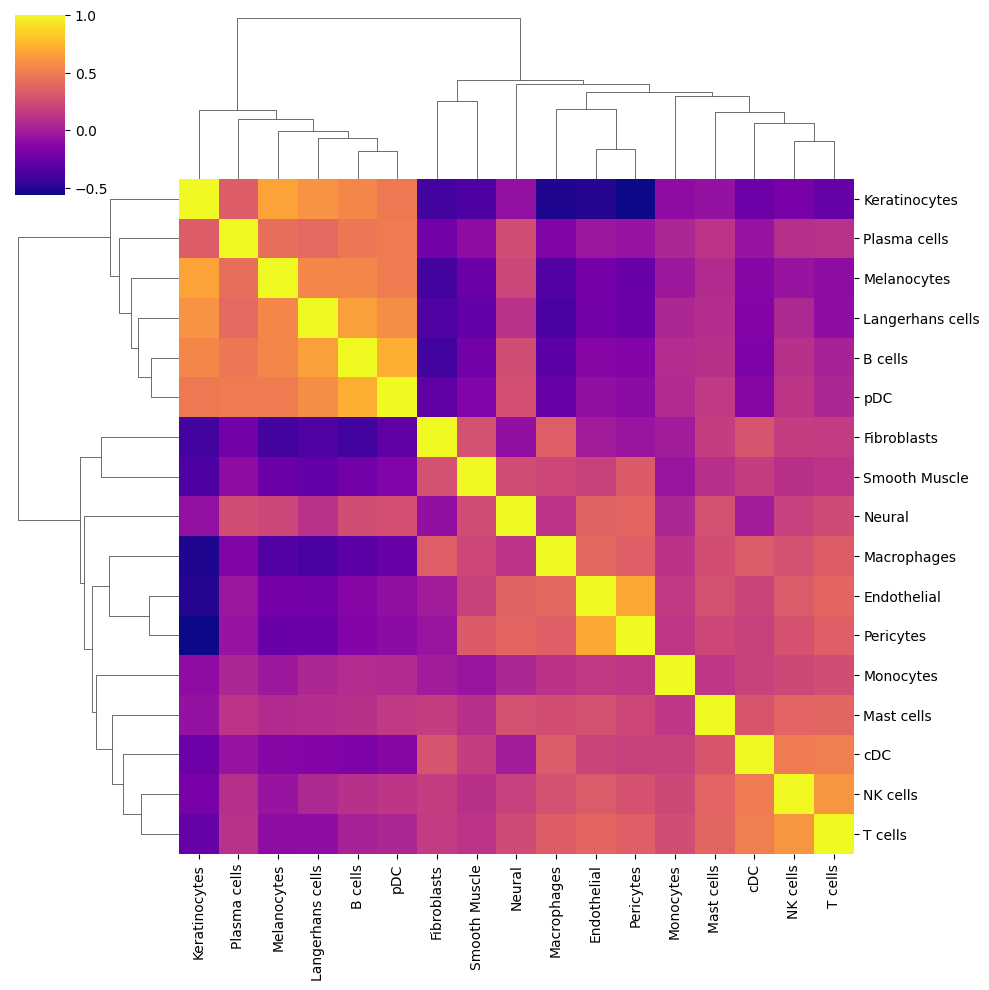

In [12]:
sns.clustermap(correlation, cmap='plasma')

In [14]:
df_healthy.to_csv(f'{out_dir}/healthy.csv')
df_ssc.to_csv(f'{out_dir}/ssc.csv')